In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import array
from scipy.optimize import curve_fit

In [29]:
#Change plot settings
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.major.width'] = 5
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.major.width'] = 5

In [30]:
os.chdir('/content/drive/My Drive/New LSTM Crack')

In [31]:
N1600 = './Test/1600N_t56.csv'
N1600_df = pd.read_csv(N1600)
N1600_arr = np.asarray(N1600_df)
N1600_cl = N1600_arr[:,1]

N1700 = './Training/1700N_t22.csv'
N1700_df = pd.read_csv(N1700)
N1700_arr = np.asarray(N1700_df)
N1700_cl = N1700_arr[:,1]

N1800 = './Training/1800N_t17.csv'
N1800_df = pd.read_csv(N1800)
N1800_arr = np.asarray(N1800_df)
N1800_cl = N1800_arr[:,1]

In [32]:
interval = 10000
avg = 50

Get X and Y values for the data

In [33]:
i = 0

X = []

while i <= len(N1600_cl):
  X_timestep = [[1600, i],[1700, i],[1800, i]]
  X.append(X_timestep)
  i += interval

X = np.asarray(X)

In [34]:
i = 0

y = []

while i <= len(N1600_cl):
  if i == 0:
    y_timestep = [[np.average(N1600_cl[i:i+avg])], [np.average(N1700_cl[i:i+avg])], [np.average(N1800_cl[i:i+avg])]]
    y.append(y_timestep)
    i+= interval
  else:
    y_timestep = [[np.average(N1600_cl[i-avg:i+avg])], [np.average(N1700_cl[i-avg:i+avg])], [np.average(N1800_cl[i-avg:i+avg])]]
    y.append(y_timestep)
    i+= interval

y = np.asarray(y)

Perform polynomial regression

In [35]:
def Polynomial_Regression(X, Y, time):
  poly_reg = PolynomialFeatures(degree=2)
  X_poly = poly_reg.fit_transform(X)
  pol_reg = LinearRegression()
  pol_reg.fit(X_poly, Y)

  return pol_reg.predict(poly_reg.transform([[1650, time],[1750, time]]))


In [36]:
i = 0

Values = []

while i < X.shape[0]:
  timestep = (i*interval)
  X_val = X[i]
  y_val = y[i]
  Values.append(Polynomial_Regression(X_val, y_val, timestep))
  i += 1

Values = np.asarray(Values)

Calculate Linear Average Values

In [37]:
i = 0

Average = []

while i < X.shape[0]:
  timestep = (i*interval)
  Average1650 = ((N1600_cl[timestep] + N1700_cl[timestep]) / 2)
  Average1750 = ((N1800_cl[timestep] + N1700_cl[timestep]) / 2)
  
  Average.append((Average1650, Average1750))
  i += 1

Average = np.asarray(Average).reshape(7, 2, 1)

Combine Original Data and Polyfit Data

In [49]:
i = 0

initial_array = []

while i <= len(N1600_cl):
  index = int(i / interval)
  if i == 0:
    initial_timestep = [[1600, np.average(N1600_cl[i:i+avg])],
                        [1650, Values[index, 0]], 
                        [1700, np.average(N1700_cl[i:i+avg])], 
                        [1750, Values[index, 1]], 
                        [1800, np.average(N1800_cl[i:i+avg])]
                        ]
    initial_array.append(initial_timestep)
    i += interval
  else:
    initial_timestep = [[1600, np.average(N1600_cl[i-avg:i+avg])],
                        [1650, Values[index, 0]], 
                        [1700, np.average(N1700_cl[i-avg:i+avg])], 
                        [1750, Values[index, 1]], 
                        [1800, np.average(N1800_cl[i-avg:i+avg])],
                        ]
    initial_array.append(initial_timestep)
    i += interval

initial_array = np.asarray(initial_array, dtype=float)
print(initial_array)

[[[1.60000000e+03 4.05332361e-02]
  [1.65000000e+03 6.85643540e-02]
  [1.70000000e+03 8.61884797e-02]
  [1.75000000e+03 9.34056132e-02]
  [1.80000000e+03 9.02157545e-02]]

 [[1.60000000e+03 3.70331596e-02]
  [1.65000000e+03 8.76988031e-02]
  [1.70000000e+03 1.23463256e-01]
  [1.75000000e+03 1.44326519e-01]
  [1.80000000e+03 1.50288592e-01]]

 [[1.60000000e+03 5.59635124e-02]
  [1.65000000e+03 1.35757428e-01]
  [1.70000000e+03 1.85635547e-01]
  [1.75000000e+03 2.05597869e-01]
  [1.80000000e+03 1.95644394e-01]]

 [[1.60000000e+03 1.03571419e-01]
  [1.65000000e+03 1.75295236e-01]
  [1.70000000e+03 2.31679759e-01]
  [1.75000000e+03 2.72724987e-01]
  [1.80000000e+03 2.98430921e-01]]

 [[1.60000000e+03 1.28868635e-01]
  [1.65000000e+03 1.92761442e-01]
  [1.70000000e+03 2.60982249e-01]
  [1.75000000e+03 3.33531057e-01]
  [1.80000000e+03 4.10407866e-01]]

 [[1.60000000e+03 1.57734703e-01]
  [1.65000000e+03 2.08500839e-01]
  [1.70000000e+03 2.97624426e-01]
  [1.75000000e+03 4.25105466e-01]
  [1

Calculate Standard Deviation

In [39]:
std_array = []

i = 0

while i <= len(N1600_cl):
  index = int(i / interval)
  if i == 0:
    initial_timestep = np.std(N1600_cl[i:i+avg])
    std_array.append(initial_timestep)

    initial_timestep = np.std(Values[index, 0])
    std_array.append(initial_timestep)

    initial_timestep = np.std(N1700_cl[i:i+avg])
    std_array.append(initial_timestep)

    initial_timestep = np.std(Values[index, 1])
    std_array.append(initial_timestep)

    initial_timestep = np.std(N1800_cl[i:i+avg])
    std_array.append(initial_timestep)
    
    i += interval
  else:
    initial_timestep = np.std(N1600_cl[i-avg:i+avg])
    std_array.append(initial_timestep)

    initial_timestep = np.std(Values[index, 0])
    std_array.append(initial_timestep)

    initial_timestep = np.std(N1700_cl[i-avg:i+avg])
    std_array.append(initial_timestep)

    initial_timestep = np.std(Values[index, 1])
    std_array.append(initial_timestep)

    initial_timestep = np.std(N1800_cl[i-avg:i+avg])
    std_array.append(initial_timestep)

    i += interval

std = np.asarray(std_array, dtype=float).reshape(7,5,1)

In [40]:
print(std)

[[[0.02388447]
  [0.        ]
  [0.01869495]
  [0.        ]
  [0.01339359]]

 [[0.02253672]
  [0.        ]
  [0.01830782]
  [0.        ]
  [0.01981921]]

 [[0.03257903]
  [0.        ]
  [0.02146022]
  [0.        ]
  [0.02766363]]

 [[0.03436946]
  [0.        ]
  [0.01850696]
  [0.        ]
  [0.02311405]]

 [[0.02610511]
  [0.        ]
  [0.01707346]
  [0.        ]
  [0.01945514]]

 [[0.02350442]
  [0.        ]
  [0.01853222]
  [0.        ]
  [0.01819492]]

 [[0.02942084]
  [0.        ]
  [0.02047925]
  [0.        ]
  [0.01690321]]]


Calculate Confidence Intervals

In [41]:
i = 0
n = 2*avg
# t value for 99.9% Confidence
z = 3.291

upper_bound = []
lower_bound = []

for step in std:
  print(step[0])
  index = int(i / interval)

  if i == 0:
    x_bar = np.average(N1600_cl[i:i+avg])
    confidence_pos = x_bar + (z *(step[0] / math.sqrt(n/2)))
    confidence_neg = x_bar - (z *(step[0] / math.sqrt(n/2)))
    upper_bound.append(confidence_pos)
    lower_bound.append(confidence_neg)


    x_bar = np.average(Values[index, 0])
    print(x_bar)
    confidence_pos = x_bar + (z *(step[1] / math.sqrt(n/2)))
    confidence_neg = x_bar - (z *(step[1] / math.sqrt(n/2)))
    upper_bound.append(confidence_pos)
    lower_bound.append(confidence_neg)

    x_bar = np.average(N1700_cl[i:i+avg])
    confidence_pos = x_bar + (z *(step[2] / math.sqrt(n/2)))
    confidence_neg = x_bar - (z *(step[2] / math.sqrt(n/2)))
    upper_bound.append(confidence_pos)
    lower_bound.append(confidence_neg)

    x_bar = np.average(Values[index, 1])
    confidence_pos = x_bar + (z *(step[3] / math.sqrt(n/2)))
    confidence_neg = x_bar - (z *(step[3] / math.sqrt(n/2)))
    upper_bound.append(confidence_pos)
    lower_bound.append(confidence_neg)

    x_bar = np.average(N1800_cl[i:i+avg])
    confidence_pos = x_bar + (z *(step[4] / math.sqrt(n/2)))
    confidence_neg = x_bar - (z *(step[4] / math.sqrt(n/2)))
    upper_bound.append(confidence_pos)
    lower_bound.append(confidence_neg)
    i += interval

  else:
    x_bar = np.average(N1600_cl[i-avg:i+avg])
    confidence_pos = x_bar + (z *(step[0] / math.sqrt(n)))
    confidence_neg = x_bar - (z *(step[0] / math.sqrt(n)))
    upper_bound.append(confidence_pos)
    lower_bound.append(confidence_neg)

    x_bar = np.average(Values[index, 0])
    confidence_pos = x_bar + (z *(step[1] / math.sqrt(n)))
    confidence_neg = x_bar - (z *(step[1] / math.sqrt(n)))
    upper_bound.append(confidence_pos)
    lower_bound.append(confidence_neg)

    x_bar = np.average(N1700_cl[i-avg:i+avg])
    confidence_pos = x_bar + (z *(step[2] / math.sqrt(n)))
    confidence_neg = x_bar - (z *(step[2] / math.sqrt(n)))
    upper_bound.append(confidence_pos)
    lower_bound.append(confidence_neg)

    x_bar = np.average(Values[index, 1])
    confidence_pos = x_bar + (z *(step[3] / math.sqrt(n)))
    confidence_neg = x_bar - (z *(step[3] / math.sqrt(n)))
    upper_bound.append(confidence_pos)
    lower_bound.append(confidence_neg)

    x_bar = np.average(N1800_cl[i-avg:i+avg])
    confidence_pos = x_bar + (z *(step[4] / math.sqrt(n)))
    confidence_neg = x_bar - (z *(step[4] / math.sqrt(n)))
    upper_bound.append(confidence_pos)
    lower_bound.append(confidence_neg)
    i += interval

upper_bound = np.asarray(upper_bound).reshape(7,5)
lower_bound = np.asarray(lower_bound).reshape(7,5)

[0.02388447]
0.06856435396000027
[0.02253672]
[0.03257903]
[0.03436946]
[0.02610511]
[0.02350442]
[0.02942084]


Get and Plot Contour Plot

In [42]:
X_vals, Y_vals =  plot_x, plot_y = initial_array.T
ts = np.asarray(list(range(0,68052,10000))*5).reshape(5,7)

In [43]:
print(X_vals)
print(ts)

[[1600. 1600. 1600. 1600. 1600. 1600. 1600.]
 [1650. 1650. 1650. 1650. 1650. 1650. 1650.]
 [1700. 1700. 1700. 1700. 1700. 1700. 1700.]
 [1750. 1750. 1750. 1750. 1750. 1750. 1750.]
 [1800. 1800. 1800. 1800. 1800. 1800. 1800.]]
[[    0 10000 20000 30000 40000 50000 60000]
 [    0 10000 20000 30000 40000 50000 60000]
 [    0 10000 20000 30000 40000 50000 60000]
 [    0 10000 20000 30000 40000 50000 60000]
 [    0 10000 20000 30000 40000 50000 60000]]


In [44]:
print(X_vals.shape)

(5, 7)


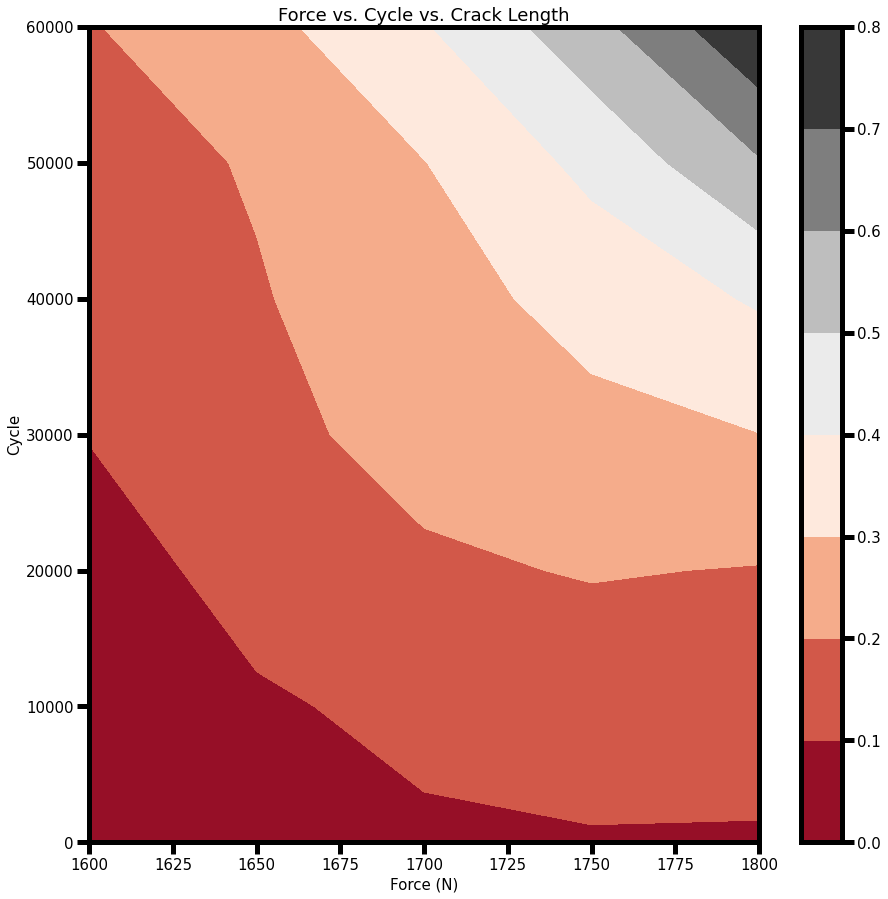

In [45]:
plt.figure(figsize=(15, 15))
plt.contourf(X_vals,ts,Y_vals, cmap = 'RdGy')
plt.colorbar()
plt.xlabel('Force (N)')
plt.ylabel('Cycle')
plt.title('Force vs. Cycle vs. Crack Length')
plt.savefig("Contour_plot.png")


Space Used to Figure out What is Wrong With the CI and STD

In [46]:
timestep = 0
color_array = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'magenta']

for array in initial_array:
  color = int(timestep / interval)
  test_x, test_y = array.T 
  print(test_y)
  print(upper_bound[color, :], lower_bound[color, :])
  print(test_y+upper_bound[color, :], test_y-lower_bound[color, :])
  timestep += interval
  print("-------------------------")

[0.04053324 0.06856435 0.08618848 0.09340561 0.09021575]
[0.05164949 0.06856435 0.09488944 0.09340561 0.09644937] [0.02941698 0.06856435 0.07748752 0.09340561 0.08398214]
[0.09218273 0.13712871 0.18107792 0.18681123 0.18666512] [0.01111625 0.         0.00870096 0.         0.00623361]
-------------------------
[0.03703316 0.0876988  0.12346326 0.14432652 0.15028859]
[0.04444999 0.0876988  0.12948836 0.14432652 0.15681109] [0.02961632 0.0876988  0.11743815 0.14432652 0.14376609]
[0.08148315 0.17539761 0.25295162 0.28865304 0.30709969] [0.00741684 0.         0.00602511 0.         0.0065225 ]
-------------------------
[0.05596351 0.13575743 0.18563555 0.20559787 0.19564439]
[0.06668527 0.13575743 0.1926981  0.20559787 0.20474849] [0.04524175 0.13575743 0.17857299 0.20559787 0.18654029]
[0.12264878 0.27151486 0.37833365 0.41119574 0.40039289] [0.01072176 0.         0.00706256 0.         0.0091041 ]
-------------------------
[0.10357142 0.17529524 0.23167976 0.27272499 0.29843092]
[0.1148824

Plot Line Graphs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array

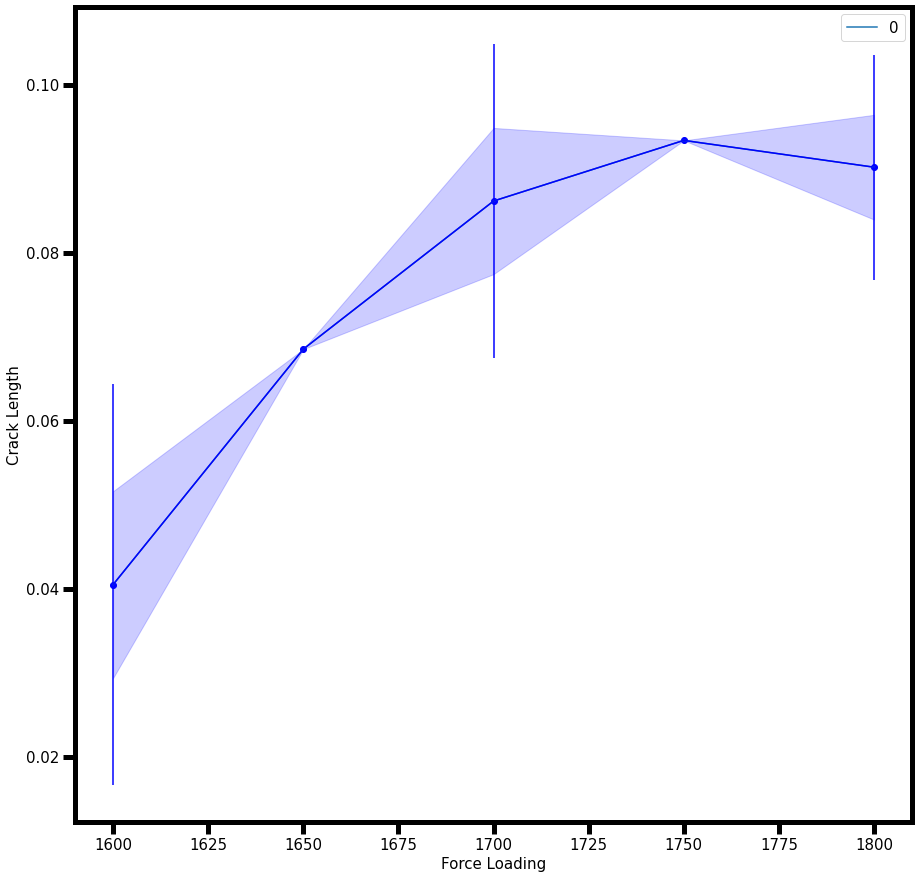

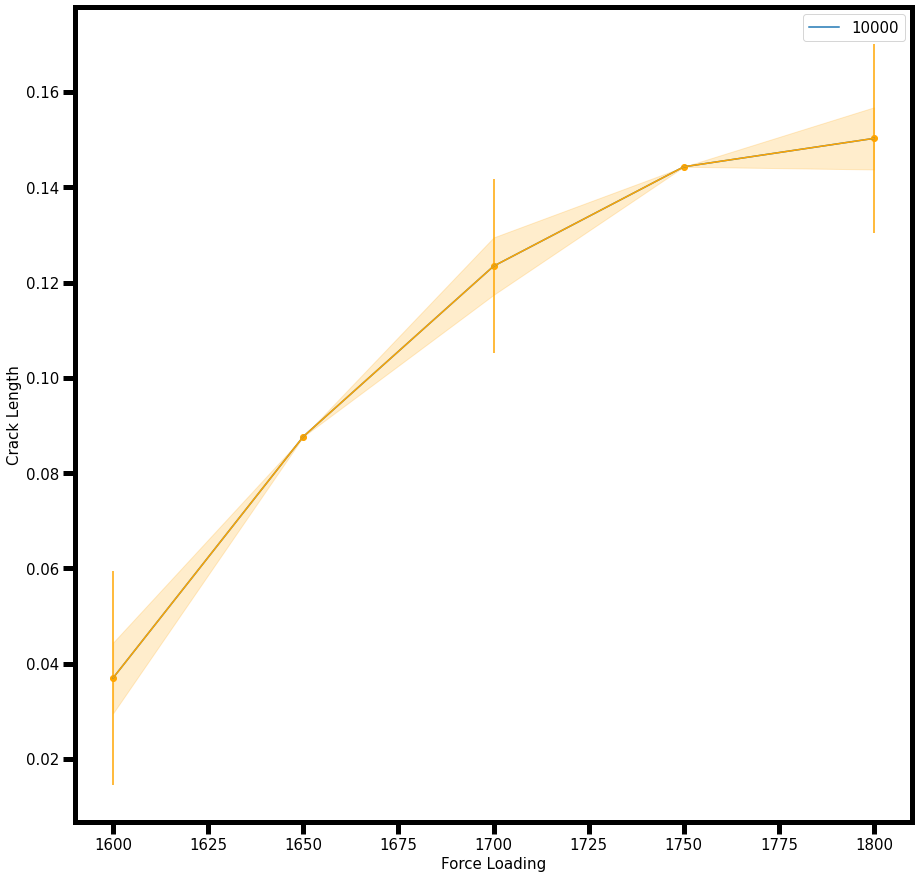

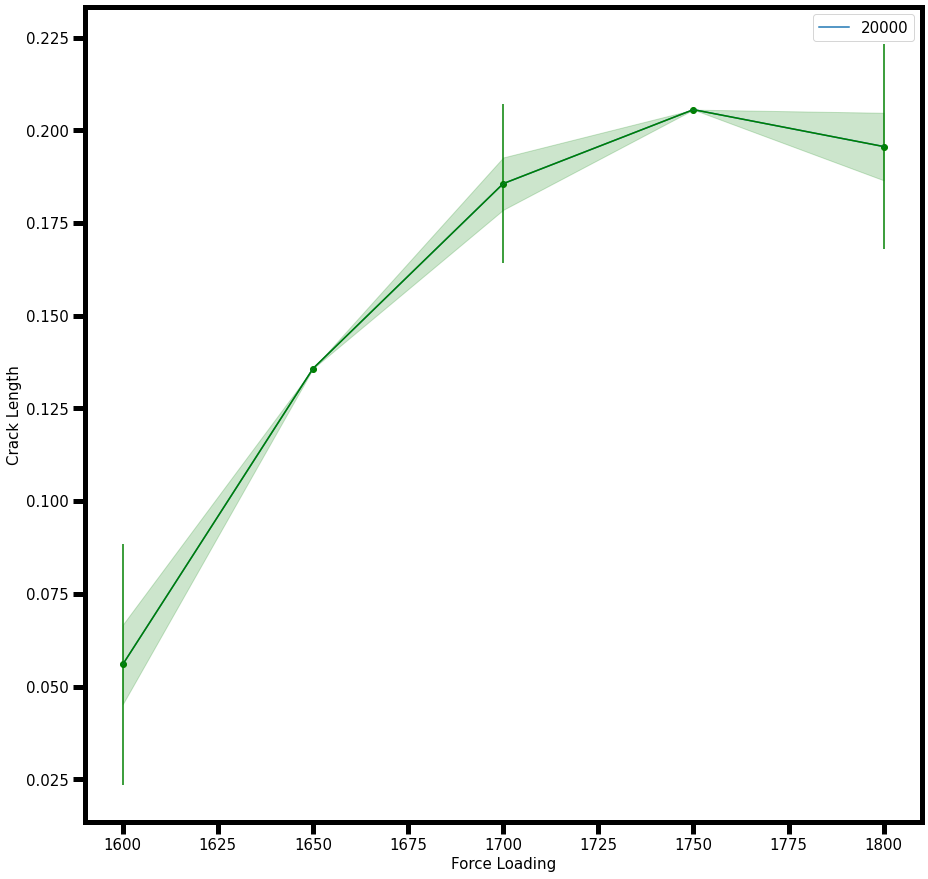

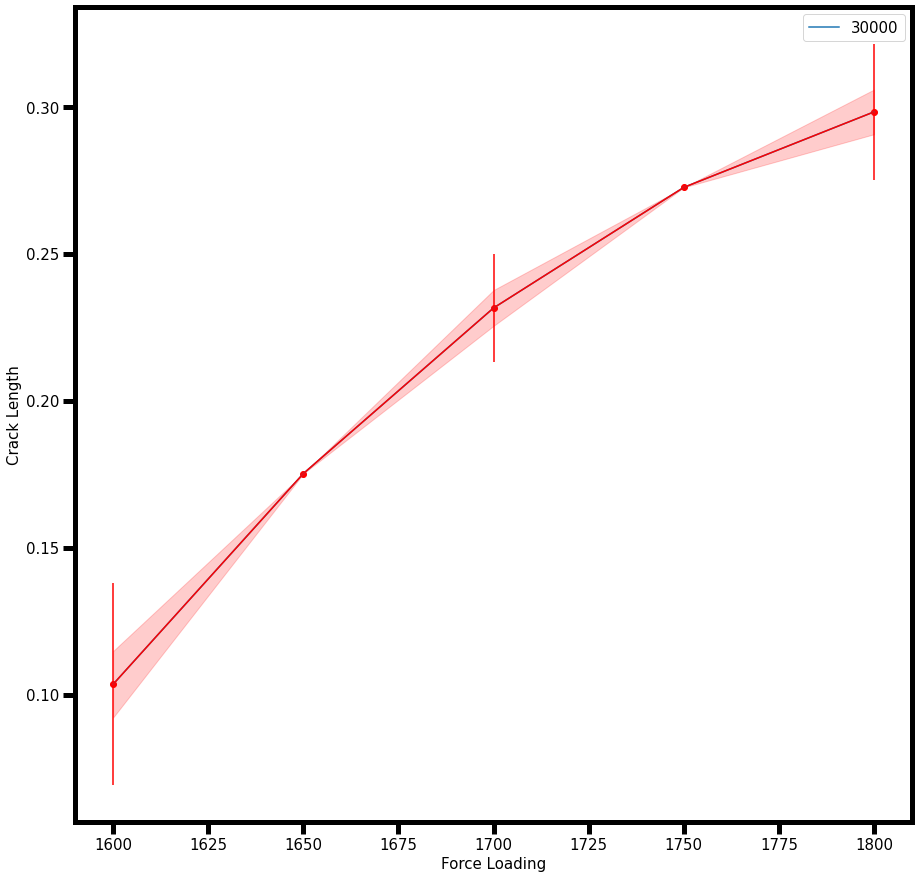

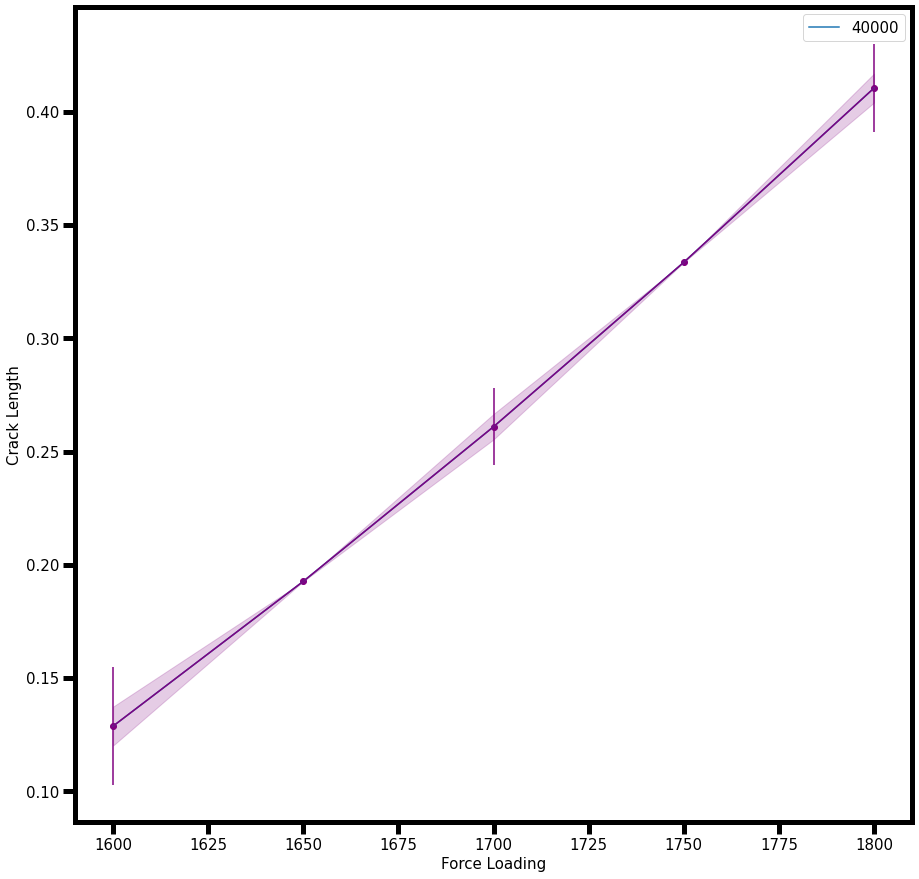

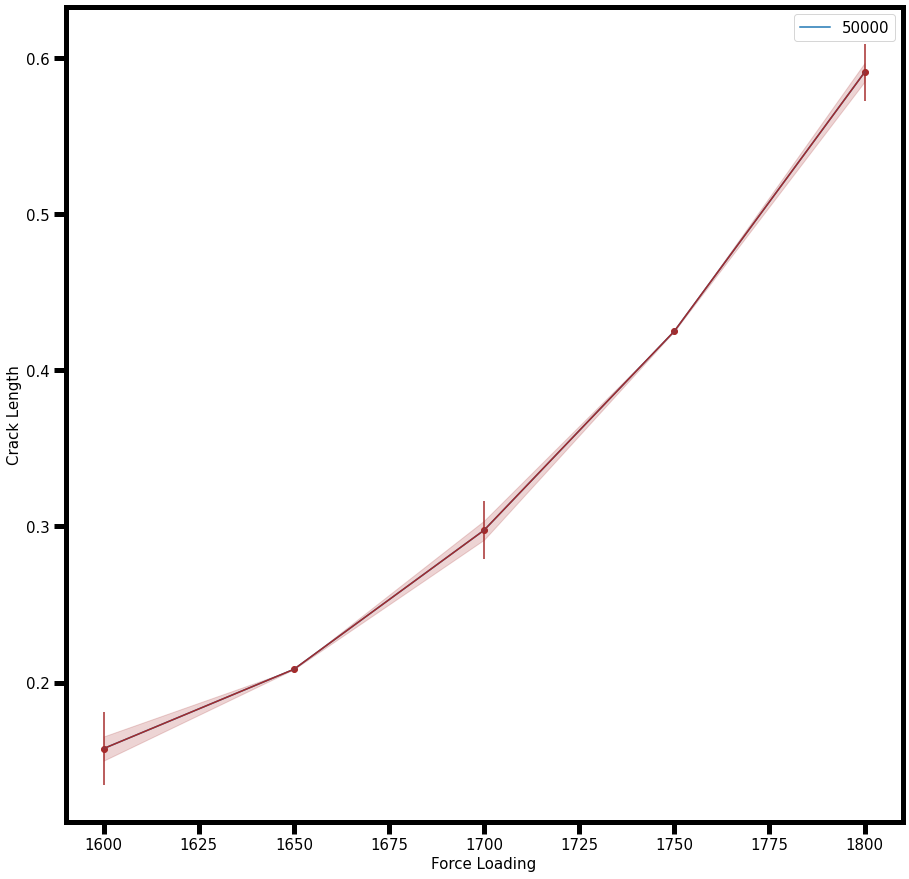

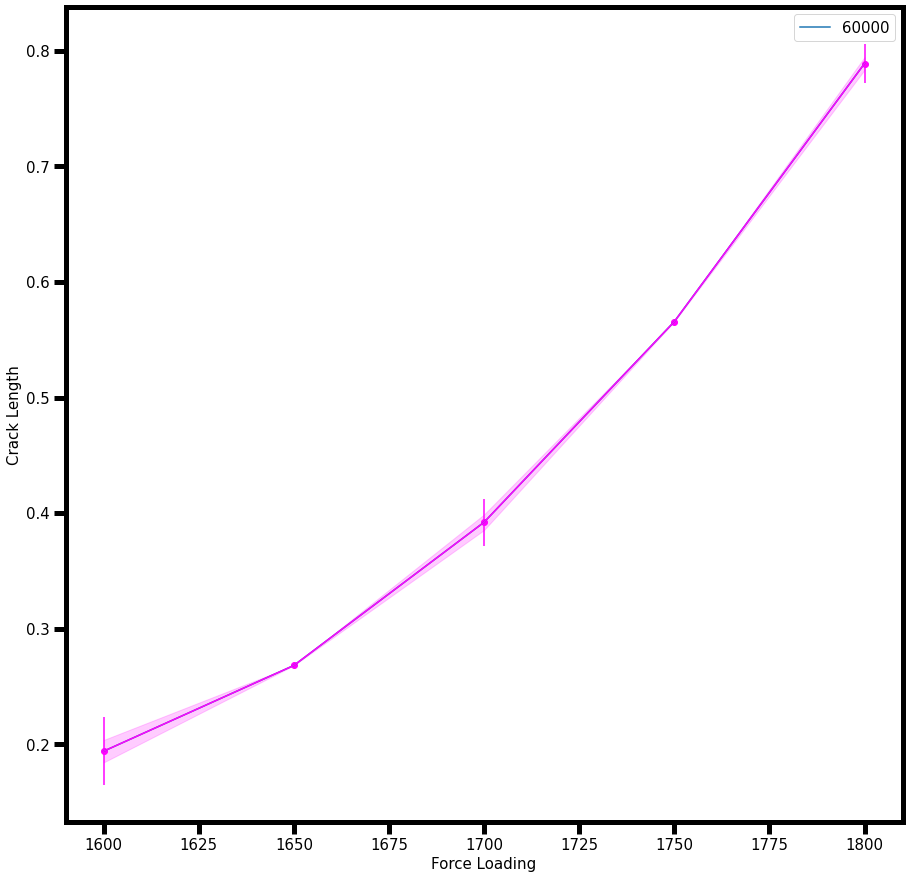

In [47]:
color_array = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'magenta']

timestep = 0
transparency = 0.2

#plt.figure(figsize=(15,15))

for array in initial_array:
  plt.figure(figsize=(15,15))

  color = int(timestep / interval)
  plot_x, plot_y = array.T  

  plt.plot(plot_x, plot_y, label = timestep)
  plt.errorbar(plot_x, plot_y, std[color,:], color = color_array[color])
  plt.fill_between(plot_x, upper_bound[color, :], lower_bound[color, :], alpha = transparency, color = color_array[color])
  plt.scatter(plot_x,plot_y, color = color_array[color])
  plt.xlabel('Force Loading')
  plt.ylabel('Crack Length')
  plt.legend()
  
  plt.savefig("Modeling_{}_CI.png".format(timestep))
  timestep += interval

In [48]:
sys.exit()

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
interval = 1

In [ ]:
i = 0

X = []

while i <= len(N1600_cl):
  X_timestep = [[1600, i],[1700, i],[1800, i]]
  X.append(X_timestep)
  i += interval

X = np.asarray(X)

print(X.shape)

In [ ]:
i = 0

y = []

while i < len(N1600_cl):
  y_timestep = [[N1600_cl[i]], [N1700_cl[i]], [N1800_cl[i]]]
  y.append(y_timestep)
  i += interval

y = np.asarray(y)

print(y.shape)

In [ ]:
i = 0

Average = []

while i < len(N1600_cl):
  timestep = (i*interval)
  Average1650 = ((N1600_cl[timestep] + N1700_cl[timestep]) / 2)
  Average1750 = ((N1800_cl[timestep] + N1700_cl[timestep]) / 2)
  
  Average.append((Average1650, Average1750))
  i += 1

Average = np.asarray(Average)

In [ ]:
i = 0

Values = []

while i < len(N1600_cl):
  timestep = (i*interval)
  X_val = X[i]
  y_val = y[i]
  Values.append(Polynomial_Regression(X_val, y_val, timestep))
  i += 1
  if (timestep % 10000) == 0:
    print(timestep)

Values = np.asarray(Values)
print(Values.shape)

In [ ]:
Values = Values.reshape(68052, 2)
Average = Average.reshape(68052, 2)
plt.figure(figsize=(15,15))
plt.plot(N1600_cl, label ='1600 Data')
plt.plot(Values[:, 0], label = '1650 Data Poly')
plt.plot(Average[:, 0], label = '1650 Data Avg')
plt.plot(N1700_cl, label= '1700 Data')
plt.plot(Values[:, 1], label = '1750 Data Poly')
plt.plot(Average[:, 1], label = '1750 Data Avg')
plt.plot(N1800_cl, label='1800 Data')
plt.xlabel('Cycle Number')
plt.ylabel('Crack Length (m)')
plt.title('Polynomial Regression vs. Average')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(N1600_cl, label = '1600 Data Real')
plt.plot(Values[:, 0], label = '1650 Data Poly')
plt.plot(Average[:, 0], label = '1650 Data Avg')
plt.plot(N1700_cl, label = '1700 Data Real')
plt.legend()
plt.show()

In [ ]:
Values = Values.reshape(68052, 2)
timestep = np.arange(0,68052,1).reshape(68052,1)
force1650 = np.asarray([1650]*68052).reshape(68052,1)

data_1650 = pd.DataFrame(Values[:,0].reshape(68052,1))
data_1650.rename(columns={0:'Crack Length'}, inplace=True)
data_1650.insert(0, 'Timestep', timestep)
data_1650.insert(2, 'Time Difference', timestep)
data_1650.insert(3, 'Force', force1650)
data_1650.to_csv('./Test/1650N.csv', index = False)


In [ ]:
Values = Values.reshape(68052, 2)
timestep = np.arange(0,68052,1).reshape(68052,1)
force1750 = np.asarray([1750]*68052).reshape(68052,1)

data_1750 = pd.DataFrame(Values[:,1].reshape(68052,1))
data_1750.rename(columns={0:'Crack Length'}, inplace=True)
data_1750.insert(0, 'Timestep', timestep)
data_1750.insert(2, 'Time Difference', timestep)
data_1750.insert(3, 'Force', force1750)
data_1750.to_csv('./Test/1750N.csv', index = False)